In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**PROJECT 3 - STUDENT PERFORMANCE**

In [31]:
df=pd.read_csv('/content/student_performance.csv')
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,1,7,7,77,72,59
1,2,4,5,72,43,58
2,3,8,4,86,72,47
3,4,5,9,81,53,94
4,5,7,8,82,60,41
...,...,...,...,...,...,...
95,96,10,4,51,81,85
96,97,9,6,84,94,77
97,98,7,4,65,65,46
98,99,9,5,90,74,99


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   student_id          100 non-null    int64
 1   hours_studied       100 non-null    int64
 2   sleep_hours         100 non-null    int64
 3   attendance_percent  100 non-null    int64
 4   previous_scores     100 non-null    int64
 5   exam_score          100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


**1) Average Exam Score by Hours Studied**

/tmp/ipython-input-157663230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(


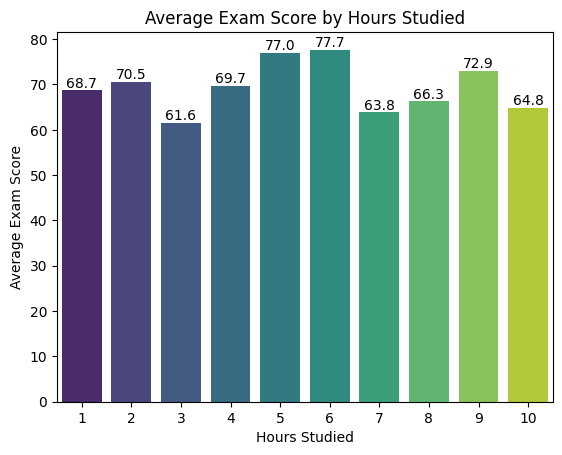

In [33]:
avg_score = df.groupby("hours_studied")["exam_score"].mean()

a=sns.barplot(
    x=avg_score.index,
    y=avg_score.values,
    palette="viridis"
)

for i in a.containers:
    a.bar_label(i,fmt='%.1f')

plt.xlabel("Hours Studied")
plt.ylabel("Average Exam Score")
plt.title("Average Exam Score by Hours Studied")
plt.show()


**Summary: Average Exam Score by Hours Studied**

This bar chart illustrates the average exam scores achieved by students based on the number of hours they studied. It reveals that students studying **5 to 6 hours** tend to have the highest average exam scores, peaking at **77.7** for 6 hours of study. Conversely, students who studied for **3 hours** show the lowest average score of **61.6**. While there's a general positive correlation, the relationship isn't strictly linear, suggesting that an optimal range for study hours might exist for better performance.

**2) Student Count Across Attendance Ranges**

/tmp/ipython-input-3823173049.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(x=attendance_count.index,


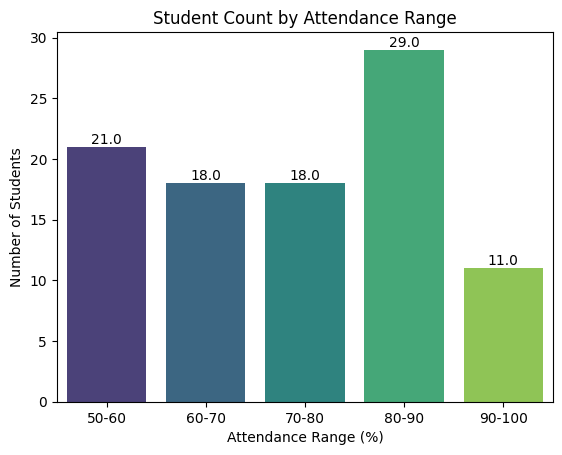

In [34]:
bins = [50, 60, 70, 80, 90, 100]
labels = ["50-60", "60-70", "70-80", "80-90", "90-100"]

df["attendance_range"] = pd.cut(df["attendance_percent"], bins=bins, labels=labels)

attendance_count = df["attendance_range"].value_counts()

a=sns.barplot(x=attendance_count.index,
            y=attendance_count.values,
            palette="viridis")

for i in a.containers:
    a.bar_label(i,fmt='%.1f')

plt.xlabel("Attendance Range (%)")
plt.ylabel("Number of Students")
plt.title("Student Count by Attendance Range")
plt.show()


**Summary: Student Count Across Attendance Ranges**

This bar chart categorizes students by their attendance percentage and shows the count of students in each range. The highest number of students, **29**, falls into the **80-90% attendance range**. The **50-60% attendance range** has the second-highest count with **21 students**. The **90-100% range** has the fewest students, with **11**. This indicates a concentration of students in higher attendance brackets, with a significant portion consistently attending between 80% and 90% of classes.

**3) Percentage Distribution of Students by Sleep Hours**

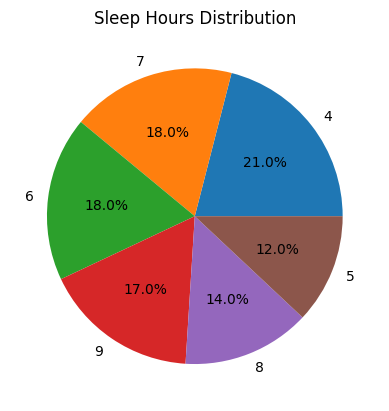

In [35]:
sleep_count = df["sleep_hours"].value_counts()

plt.pie(sleep_count.values, labels=sleep_count.index, autopct="%1.1f%%")
plt.title("Sleep Hours Distribution")
plt.show()


**Summary: Percentage Distribution of Students by Sleep Hours**

This pie chart displays the distribution of students based on their reported sleep hours. The largest group of students, **21%**, sleeps for **4 hours**. Following closely, **7 and 6 hours of sleep** each account for **18%** of the students. Students sleeping for **9 hours** make up **17%**, while those sleeping **8 hours** are **14%**. The smallest group, **12%**, sleeps for **5 hours**. This distribution shows a varied sleep pattern among students, with a notable portion getting less sleep (4-5 hours) and others getting more (6-9 hours).

**4) Exam Score Category-wise Student Percentage**

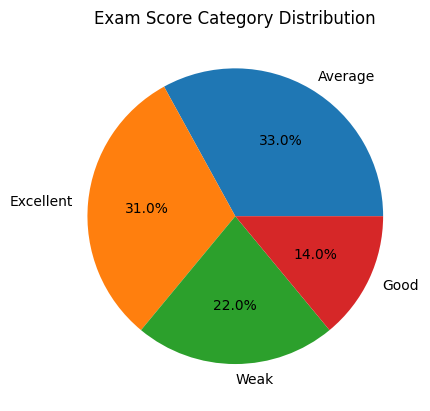

In [36]:
def categorize(score):
    if score < 50:
        return "Weak"
    elif 50 <= score <= 70:
        return "Average"
    elif 70 < score <= 85:
        return "Good"
    else:
        return "Excellent"



df["score_category"] = df["exam_score"].apply(categorize)

category_count = df["score_category"].value_counts()

plt.pie(category_count.values, labels=category_count.index, autopct="%1.1f%%")
plt.title("Exam Score Category Distribution")
plt.show()


**Summary: Exam Score Category-wise Student Percentage**

This pie chart categorizes students' exam performance into four groups: Weak, Average, Good, and Excellent. The largest category is **Average**, comprising **33.0%** of students, followed closely by **Excellent** with **31.0%**. Students categorized as **Weak** make up **22.0%**, and the smallest group is **Good**, accounting for **14.0%**. This distribution indicates a significant portion of students perform either in the average or excellent range, with a smaller but notable percentage falling into the weak category.

**5) Trend of Average Exam Score with Hours Studied**

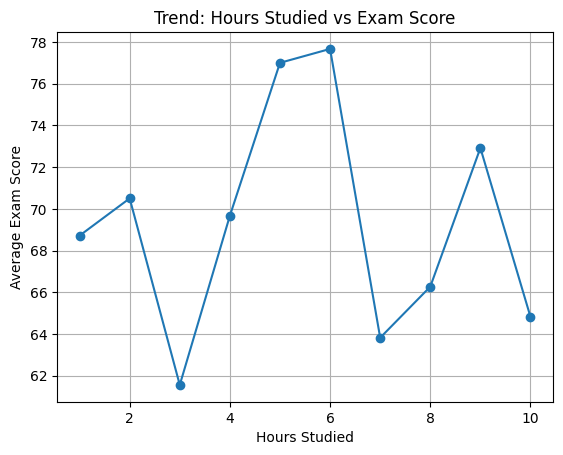

In [37]:
avg_score = df.groupby("hours_studied")["exam_score"].mean()

plt.plot(avg_score.index, avg_score.values, marker='o')
plt.xlabel("Hours Studied")
plt.ylabel("Average Exam Score")
plt.title("Trend: Hours Studied vs Exam Score")
plt.grid(True)
plt.show()


#### **Summary: Trend of Average Exam Score with Hours Studied**

This line plot visualizes the trend of average exam scores as the number of hours studied increases. The trend shows fluctuations rather than a consistent increase. Average scores are relatively high for **1-2 hours** of study, dip at **3 hours**, then rise again, peaking around **5-6 hours**. After this peak, scores generally decline for higher study hours, with a slight increase at **9 hours**. This suggests that simply increasing study hours doesn't guarantee a higher score, and there might be an optimal range or other factors at play.